In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/ACER/Downloads/product/product_data0.csv")
for i in range(1,25):
    try:
        df2=pd.read_csv("C:/Users/ACER/Downloads/product/product_data{}.csv".format(i))
        df = pd.concat([df, df2], axis=0)
    except:
        continue
df.to_csv("C:/Users/ACER/Downloads/data_demo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 110
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2790 non-null   float64
 1   sku                      2790 non-null   float64
 2   short_description        2790 non-null   object 
 3   price                    2790 non-null   float64
 4   list_price               2790 non-null   float64
 5   price_usd                0 non-null      float64
 6   discount                 2790 non-null   float64
 7   discount_rate            2790 non-null   float64
 8   review_count             2790 non-null   float64
 9   order_count              0 non-null      float64
 10  inventory_status         2790 non-null   object 
 11  is_visible               0 non-null      float64
 12  stock_item_qty           2790 non-null   float64
 13  stock_item_max_sale_qty  2790 non-null   float64
 14  product_name             

In [4]:
df=df.drop(['id','sku','short_description','price_usd','order_count','inventory_status','is_visible','stock_item_qty','stock_item_max_sale_qty','product_name'],axis=1)
df

,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
0,808000.0,954556.0,146556.0,15.0,808.0,145924.0,Ensure,28546.0,4.8,do-choi-me-be,2549
1,919000.0,1078000.0,159000.0,15.0,302.0,149737.0,Pediasure,2764.0,5.0,do-choi-me-be,2549
2,599000.0,733282.0,134282.0,18.0,528.0,149737.0,Pediasure,8055.0,4.8,do-choi-me-be,2549
3,1005000.0,1238569.0,233569.0,19.0,716.0,149737.0,Pediasure,12707.0,4.8,do-choi-me-be,2549
4,1239000.0,1426944.0,187944.0,13.0,257.0,149741.0,Glucerna,2837.0,5.0,do-choi-me-be,2549
...,...,...,...,...,...,...,...,...,...,...,...
106,1019000.0,1019000.0,0.0,0.0,1.0,27464.0,TP-Link,1.0,5.0,may-anh,1801
107,1350000.0,2000000.0,650000.0,33.0,11.0,545395.0,ASPORT,31.0,4.5,may-anh,1801
108,2000000.0,2000000.0,0.0,0.0,43.0,228755.0,Andbon,205.0,4.8,may-anh,1801
109,129999.0,129999.0,0.0,0.0,11.0,193617.0,VSGO,31.0,4.6,may-anh,1801


In [5]:
df.describe()

,price,list_price,discount,discount_rate,review_count,brand_id,quantity_sold,rating_average
count,2.790000e+03,2.790000e+03,2.790000e+03,2790.000000,2790.000000,2.790000e+03,2790.000000,2790.000000
mean,6.643494e+05,8.391714e+05,1.748220e+05,14.543728,127.037634,8.486860e+05,966.222222,4.462545
std,2.438186e+06,2.914660e+06,7.634445e+05,18.161916,362.084557,1.764802e+06,4178.606295,1.001536
min,2.000000e+03,2.000000e+03,0.000000e+00,0.000000,0.000000,1.782500e+04,1.000000,0.000000
25%,9.200000e+04,1.000000e+05,0.000000e+00,0.000000,3.000000,1.114610e+05,11.000000,4.500000
50%,1.810000e+05,2.200000e+05,6.714500e+03,5.000000,17.000000,1.114610e+05,73.000000,4.700000
75%,4.050000e+05,5.057500e+05,9.100000e+04,28.000000,88.000000,3.689340e+05,447.000000,5.000000
max,5.600000e+07,5.600000e+07,1.300000e+07,92.000000,6739.000000,8.140035e+06,127617.000000,5.000000


<AxesSubplot:>

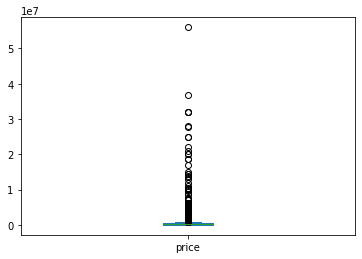

In [6]:
df['price'].plot(kind='box')

In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

<AxesSubplot:>

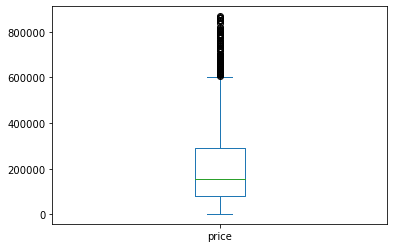

In [8]:
df['price'].plot(kind='box')

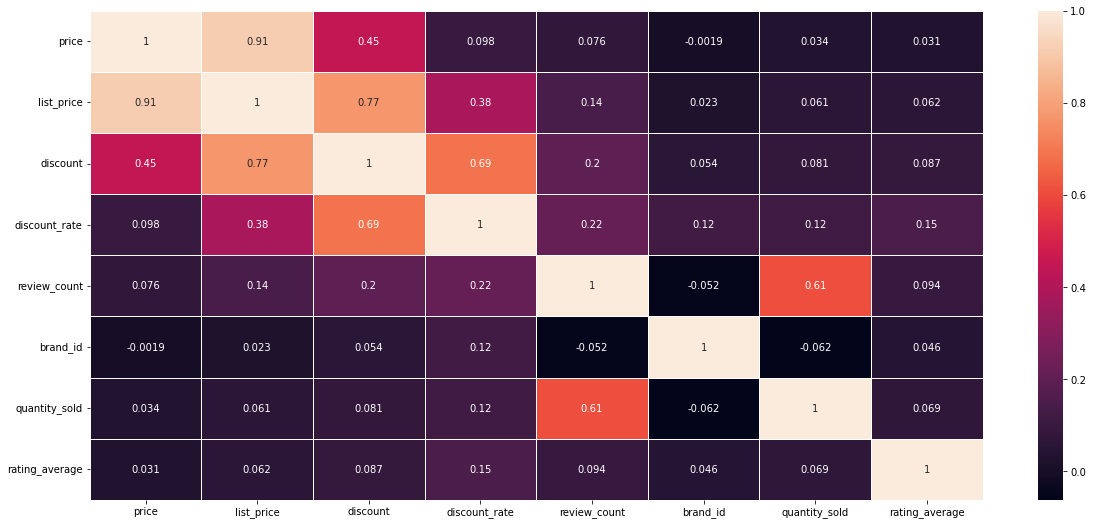

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,9))    
sns.heatmap(corr, annot=True, linewidths=.5);

<AxesSubplot:xlabel='category_type', ylabel='count'>

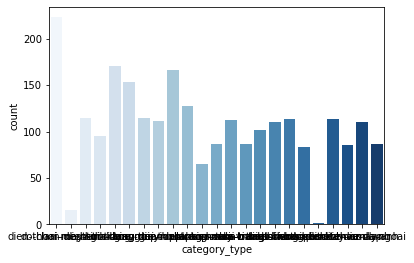

In [10]:
sns.countplot(data=df,x='category_type', palette='Blues')

In [11]:
df.sort_values(by='discount_rate',ascending=False)

,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
226,6000.0,72000.0,66000.0,92.0,18.0,26283.0,Pigeon,265.0,5.0,do-choi-me-be,2549
69,49000.0,346000.0,297000.0,86.0,9.0,8140035.0,SIXDO,46.0,5.0,phu-kien-thoi-trang,27498
81,490000.0,2500000.0,2010000.0,80.0,28.0,160667.0,ZAGG,76.0,4.6,thiet-bi-kts-phu-kien-so,1815
67,115000.0,520000.0,405000.0,78.0,45.0,537199.0,SARIFA,137.0,4.7,phu-kien-thoi-trang,27498
160,31000.0,129000.0,98000.0,76.0,178.0,526847.0,DUWA,566.0,4.7,giay-dep-nam,1686
...,...,...,...,...,...,...,...,...,...,...,...
90,191000.0,191000.0,0.0,0.0,2.0,111461.0,OEM,5.0,4.5,giay-dep-nu,1703
91,199000.0,199000.0,0.0,0.0,2.0,111461.0,OEM,4.0,4.0,giay-dep-nu,1703
86,639000.0,639000.0,0.0,0.0,0.0,111461.0,OEM,1.0,0.0,laptop-may-vi-tinh-linh-kien,1846
85,118000.0,118000.0,0.0,0.0,71.0,111461.0,OEM,721.0,4.7,laptop-may-vi-tinh-linh-kien,1846


In [12]:
df.sort_values(by='review_count',ascending=False)

,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
8,331000.0,677000.0,346000.0,51.0,6739.0,48077.0,LocknLock,36658.0,4.7,nha-cua-doi-song,1883
19,119000.0,149000.0,30000.0,20.0,4192.0,25422.0,Xiaomi,40584.0,4.7,thiet-bi-kts-phu-kien-so,1815
17,290000.0,400000.0,110000.0,28.0,3782.0,50629.0,ANKER,12253.0,5.0,thiet-bi-kts-phu-kien-so,1815
1,419000.0,799000.0,380000.0,48.0,3709.0,746615.0,Parroti,13826.0,4.8,nha-cua-doi-song,1883
82,152000.0,270000.0,118000.0,44.0,3416.0,65071.0,L'amont En Provence,50872.0,4.6,lam-dep-suc-khoe,1520
...,...,...,...,...,...,...,...,...,...,...,...
16,19000.0,19000.0,0.0,0.0,0.0,111461.0,OEM,2.0,0.0,giay-dep-nam,1686
69,24999.0,24999.0,0.0,0.0,0.0,111461.0,OEM,2.0,0.0,giay-dep-nu,1703
107,396000.0,396000.0,0.0,0.0,0.0,41048.0,Sunhouse,5.0,0.0,dien-gia-dung,1882
52,32340.0,36162.0,3822.0,11.0,0.0,111461.0,OEM,1.0,0.0,balo-va-vali,6000


In [13]:
df.groupby(['brand_name']).max()['price'].sort_values(ascending=False)

brand_name
Casio          868000.0
Xiaomi         863000.0
Philips        859000.0
LocknLock      859000.0
Prolink        859000.0
                 ...   
CCC             19000.0
jones'.         18000.0
FPT             18000.0
BB              15000.0
Rhino Store      8000.0
Name: price, Length: 630, dtype: float64

In [14]:
df.groupby(['brand_name']).min()['price'].sort_values(ascending=False)

brand_name
Prolink                 859000.0
Fatz Baby               850000.0
Nature's Way            820000.0
Covergirl               818000.0
Hoto                    809000.0
                          ...   
Rhino Store               8000.0
Pigeon                    6000.0
TQJ                       4950.0
OEM                       3000.0
Siêu Thị Thiên Nhiên      2000.0
Name: price, Length: 630, dtype: float64

In [15]:
df.groupby(['brand_name']).max()['quantity_sold'].sort_values(ascending=False)

brand_name
Simply                 127617.0
MILO                    93271.0
L'amont En Provence     50872.0
Xiaomi                  40584.0
LocknLock               36658.0
                         ...   
REGAIL                      1.0
RAM LEATHER                 1.0
JIASHI                      1.0
Spring Leaf                 1.0
SUNPOLO                     1.0
Name: quantity_sold, Length: 630, dtype: float64

In [16]:
df.groupby(['brand_name']).mean()['rating_average'].sort_values(ascending=False)

brand_name
MICOCAH            5.0
Crénot            5.0
Let-green          5.0
Silcot             5.0
Colorful           5.0
                  ... 
LazyChef           0.0
Rạng Đông          0.0
Kingston           0.0
Đệ Nhất Yến Đảo    0.0
Meiji              0.0
Name: rating_average, Length: 630, dtype: float64

In [17]:
df.groupby(['category_type']).max()['price'].sort_values(ascending=False)

category_type
dong-ho-va-trang-suc            868000.0
cross-border-hang-quoc-te       863000.0
laptop-may-vi-tinh-linh-kien    859000.0
dien-gia-dung                   859000.0
the-thao-da-ngoai               859000.0
may-anh                         850000.0
thiet-bi-kts-phu-kien-so        850000.0
do-choi-me-be                   850000.0
lam-dep-suc-khoe                839000.0
nha-cua-doi-song                800000.0
giay-dep-nam                    799000.0
balo-va-vali                    799000.0
bach-hoa-online                 798000.0
tui-thoi-trang-nam              792000.0
dien-tu-dien-lanh               785000.0
dien-thoai-may-tinh-bang        750000.0
giay-dep-nu                     749500.0
thoi-trang-nam                  699999.0
o-to-xe-may-xe-dap              620600.0
tui-vi-nu                       580000.0
phu-kien-thoi-trang             520000.0
thoi-trang-nu                   515000.0
voucher-dich-vu                 249000.0
Name: price, dtype: float64

In [18]:
df=df.drop(['brand_name','category_type'],axis=1)

In [19]:
y=df['price']
X=df.drop(['price'],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print("Regression Report:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2):", r2)

In [23]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=2023)
decision_tree.fit(X_train, y_train)
y_pred_tree=decision_tree.predict(X_test)
regression_report(y_test, y_pred_tree)

Regression Report:
Mean Absolute Error (MAE): 8940.315646258503
Mean Squared Error (MSE): 636212143.8204081
Root Mean Squared Error (RMSE): 25223.246099984994
R-squared (R^2): 0.9816716319868891


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=2023)
rf.fit(X_train, y_train)
y_pred_forest=rf.predict(X_test)
regression_report(y_test, y_pred_forest)

Regression Report:
Mean Absolute Error (MAE): 4308.204680272109
Mean Squared Error (MSE): 198115703.2353399
Root Mean Squared Error (RMSE): 14075.35801446414
R-squared (R^2): 0.994292568047713


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2023)
gbm.fit(X_train, y_train)
y_pred_gbm=gbm.predict(X_test)
regression_report(y_test, y_pred_gbm)

Regression Report:
Mean Absolute Error (MAE): 5846.998999416948
Mean Squared Error (MSE): 165448588.90973184
Root Mean Squared Error (RMSE): 12862.682026301196
R-squared (R^2): 0.9952336612020982


In [26]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
regression_report(y_test, y_pred_knn)

Regression Report:
Mean Absolute Error (MAE): 25992.010884353742
Mean Squared Error (MSE): 2038855140.8761904
Root Mean Squared Error (RMSE): 45153.68358037017
R-squared (R^2): 0.941263479940819


In [27]:
from sklearn.model_selection import KFold, cross_val_score


seed = 1000
def generate_baseline_results(models, X, y, metrics, cv=3, plot_results=False):
    # define k-fold:
    kfold = KFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # sort by accuracy
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)

    return baseline_results

models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=k)
]

baseline_results = generate_baseline_results(models, X, y, metrics='r2', cv=3, plot_results=False)
print(baseline_results)


                               Mean  Standard Deviation
model_name                                             
GradientBoostingRegressor  0.996414            0.001509
RandomForestRegressor      0.995531            0.001001
DecisionTreeRegressor      0.988015            0.006023
KNeighborsRegressor        0.937522            0.004447


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(8, 4)
        self.layer2 = nn.Linear(4, 4)
        self.out = nn.Linear(4, 1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x

net = Net()

In [30]:
torch_X_train = torch.tensor(X_train).type(torch.float32)
torch_y_train = torch.tensor(y_train.values).type(torch.float32)

torch_X_test = torch.tensor(X_test).type(torch.float32)
torch_y_test = torch.tensor(y_test.values).type(torch.float32)


In [31]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [32]:
for x, target in zip(torch_X_train, torch_y_train):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

C:\Users\ACER\anaconda\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [33]:
total_loss = 0
for x, target in zip(torch_X_test, torch_y_test):
    output = net(x)
    loss = criterion(output, target)
    total_loss += loss

avg_loss = total_loss / len(torch_X_test)

In [34]:
torch_rmse = torch.sqrt(avg_loss).detach().numpy()

In [35]:
print("PyTorch RMSE:", torch_rmse)

PyTorch RMSE: 228750.34
